In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
import math

In [5]:
def unfairness_score(Y, W, node_idx):
    '''
        Calculates the unfairness score for node 'node_idx' where Y is the nxd embedding matrix and W
        is the weighted adjacency matrix. 
        
        The unfairness score is \sum_{j=1}^n |Y_i - Y_j|^2 W[i,j]
    '''
    
    unfairness = 0.0
    for j in range(len(Y)):
        if W[node_idx][j] == 0:
            continue 
        unfairness += np.linalg.norm(Y[node_idx] - Y[j])*W[node_idx][j]
    return unfairness 

def unfairness_scores(Y, W):
    return [unfairness_score(Y, W, i) for i in range(len(Y))]

def unfairness_scores_normalized(Y, W, G):
    degrees = [G.degree[node] for node in G.nodes()]
    degree_normalized_scores = [unfairness_score(Y, W, i)/degrees[i] if degrees[i] > 0 
            else 0 
            for i in range(len(Y))]
    return degree_normalized_scores/np.max(degree_normalized_scores)

In [15]:
Y = np.load("embeddings/Facebook/Node2Vec/Facebook_Node2Vec_64_embedding.npy")
G = nx.read_edgelist("edgelists/facebook_combined.edgelist")
W = nx.to_numpy_array(G)

In [16]:
scores = unfairness_scores_normalized(Y, W, G)

In [17]:
scores_unnormalized = unfairness_scores(Y, W)

(array([2.218e+03, 8.130e+02, 4.840e+02, 2.610e+02, 1.220e+02, 5.600e+01,
        3.700e+01, 2.000e+01, 5.000e+00, 5.000e+00, 4.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

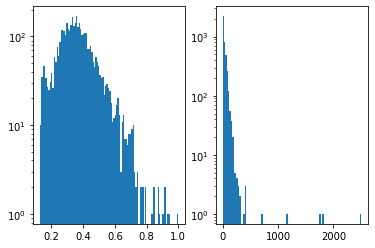

In [18]:
fig, axs = plt.subplots(ncols=2)
axs[0].hist(scores, log=True, bins=100)
axs[1].hist(scores_unnormalized, log=True, bins=100)

In [19]:
def sample_and_plot(G, fairness_scores, sample_size=200, num_samples=4):
    fig, axs = plt.subplots(ncols=num_samples, figsize=(40,40))
    nodes = list(G.nodes())
    for sample_idx in range(num_samples):
        node_indices = np.array(range(len(nodes)))
        node_indices_sample = np.random.choice(node_indices, size=sample_size, replace=False)
        nodes_sample = [nodes[i] for i in node_indices_sample]
        #node_sample_colors = [(1, 0, 0, fairness_scores[i]) for i in node_indices_sample]
        node_sample_colors = [math.sqrt(fairness_scores[i]) for i in node_indices_sample]
        G_sample = G.subgraph(nodes_sample)
        print(len(G_sample.edges()))
        nx.draw_networkx(G_sample, 
                         ax=axs,
#                          ax=axs[sample_idx], 
                         with_labels=False, 
                         node_size=300, 
                         width=1, 
                         node_color=node_sample_colors,
                         cmap=cm.get_cmap("RdYlGn"))

88234


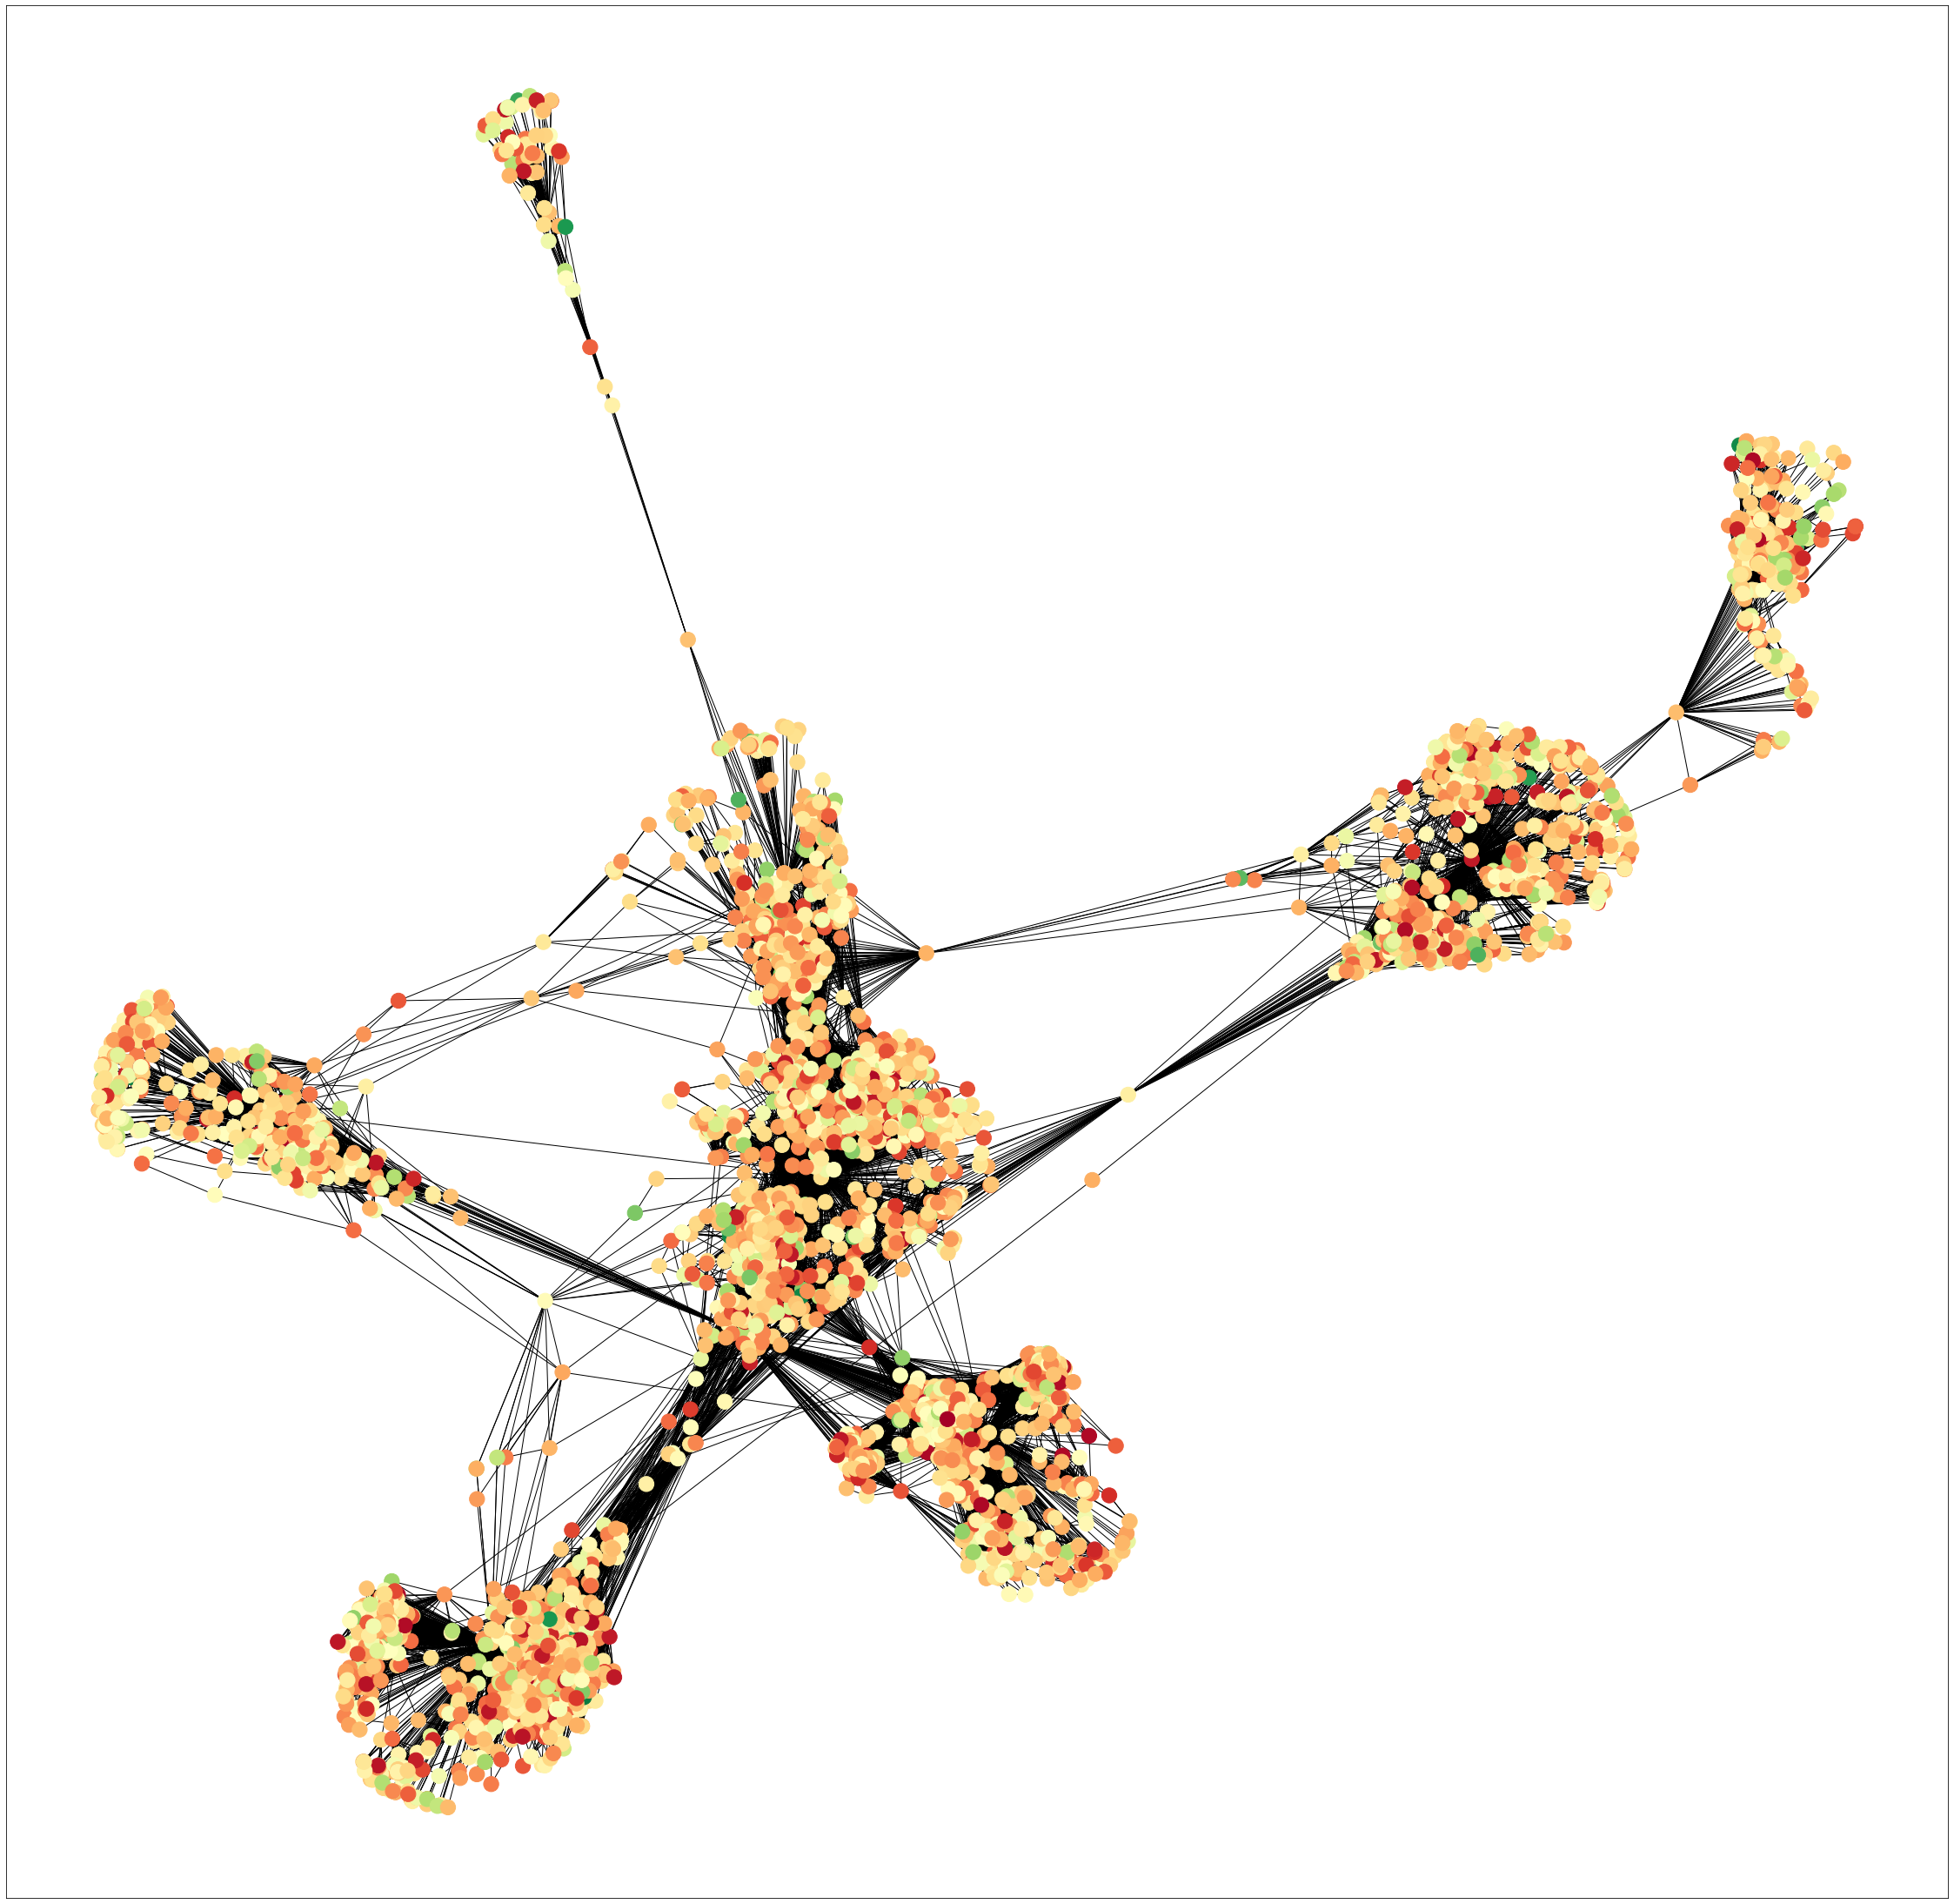

In [20]:
sample_and_plot(G, scores, sample_size=len(G), num_samples=1)

In [ ]:
fig, axs = plt.subplots(ncols=num_samples, figsize=(15,5))
